## 데이터 전처리 및 EDA - AGE, Sex, Embarked 결측치(비어 있는 값) 처리

### 학습 내용
 * 데이터 확인 및 전처리

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # No module named 'missingno' 발생시, 위의 pip install missingno 설치 필요
import numpy as np

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 01. EDA(탐색적 데이터 탐색)
 * 데이터에 익숙해 지기
 * 데이터 자료형에 대해 알아가기
 * 데이터 컬럼명 알아보기

### 결측치 확인

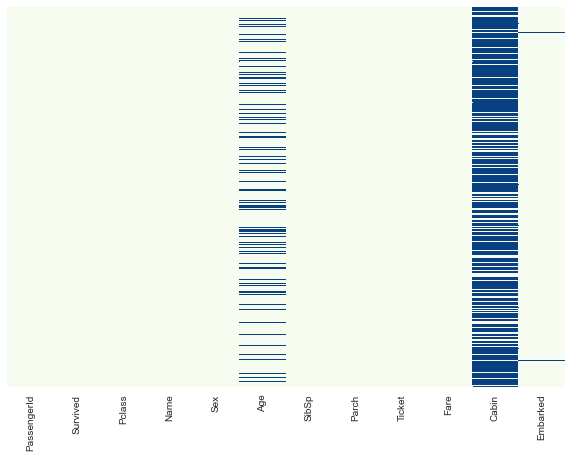

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap="GnBu")  # cbar : summer 등

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치형 변수 살펴보기

In [36]:
num_cols = [col for col in train.columns[:12] 
               if train[col].dtype in ['int64', 'float64'] ]
print(num_cols)
train[num_cols].describe()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 살펴보기

In [37]:
cat_cols = [col for col in train.columns[:12] 
                  if train[col].dtype in ['O'] ]

print(cat_cols)

train[cat_cols].describe()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [38]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
              ..
A7             1
B41            1
E10            1
B79            1
B37            1
Name: Cabin, Length: 147, dtype: int64

### 범주형 데이터 값은 어떤 것이 있을까?

In [39]:
for col in cat_cols:
    uniq = np.unique(train[col].astype(str))
    print("colname : {}, uniq : {}".format(col, uniq), end="\n\n")

colname : Name, uniq : ['Abbing, Mr. Anthony' 'Abbott, Mr. Rossmore Edward'
 'Abbott, Mrs. Stanton (Rosa Hunt)' 'Abelson, Mr. Samuel'
 'Abelson, Mrs. Samuel (Hannah Wizosky)' 'Adahl, Mr. Mauritz Nils Martin'
 'Adams, Mr. John' 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)'
 'Aks, Mrs. Sam (Leah Rosen)' 'Albimona, Mr. Nassef Cassem'
 'Alexander, Mr. William' 'Alhomaki, Mr. Ilmari Rudolf' 'Ali, Mr. Ahmed'
 'Ali, Mr. William' 'Allen, Miss. Elisabeth Walton'
 'Allen, Mr. William Henry' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine'
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)'
 'Allum, Mr. Owen George'
 'Andersen-Jensen, Miss. Carla Christine Nielsine' 'Anderson, Mr. Harry'
 'Andersson, Master. Sigvard Harald Elias'
 'Andersson, Miss. Ebba Iris Alfrida' 'Andersson, Miss. Ellis Anna Maria'
 'Andersson, Miss. Erna Alexandra' 'Andersson, Miss. Ingeborg Constanzia'
 'Andersson, Miss. Sigrid Elisabeth' 'Andersson, Mr. Anders Johan'
 'Andersson, Mr. August Edvard ("Wenne

### 생존자 사망자의 비율이 얼마나 될까?

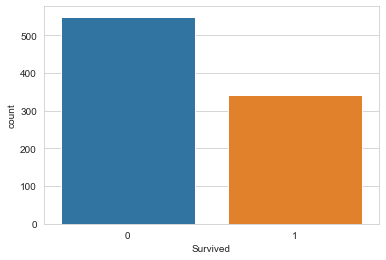

In [14]:
sns.set_style('whitegrid')   # seaborn 스타일 지정
sns.countplot(x='Survived', data=train)

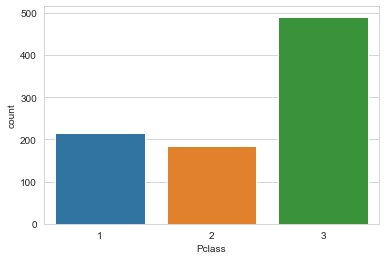

In [15]:
## 해보기 : PClass 별 Count
sns.countplot(x='Pclass', data=train)

### 나이에 대해 살펴보기

(0.0, 96.421405713925)

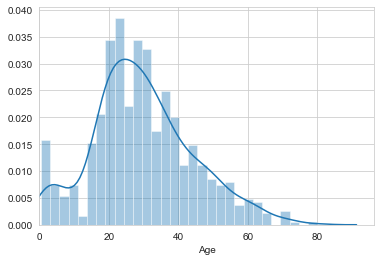

In [16]:
sns.distplot(train['Age'].dropna(), bins=30).set_xlim(0,)

(0.0, 556.2418231843072)

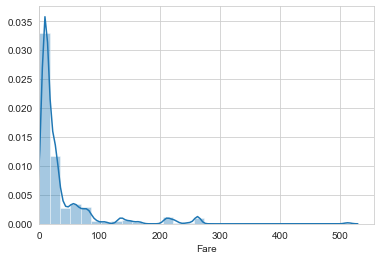

In [17]:
## 해보기 Fare
sns.distplot(test['Fare'].dropna(), bins=30).set_xlim(0,)

### plt.subplots(행, 열, figsize=(크기지정))

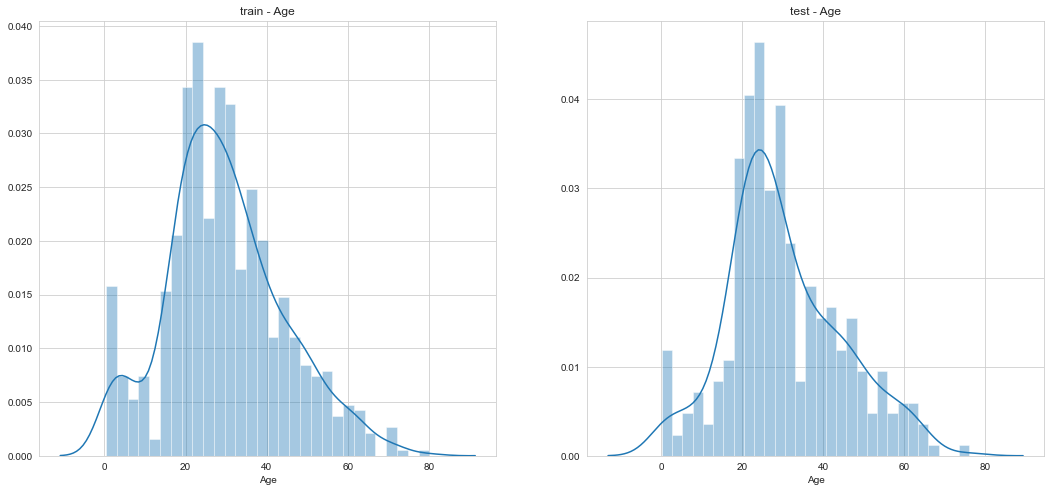

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

### 결측치 처리

* 나이는 평균값으로 처리하자.
* 결측치 값을 채우기 -  usage : data['열이름'].fillna(값)

In [19]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

## 해보기 
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### 결측치 처리 두번째 Embarked(승선항)
 * 가장 많이 나온 값으로 결측치 처리를 하자
 * 범주(구분,종류)별 데이터 개수 => [Syntax] 데이터셋명['컬럼명'].value_counts() 

In [20]:
val_Embarked = train['Embarked'].value_counts() 
train['Embarked'] = train['Embarked'].fillna('S')

In [21]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### 라벨 인코딩 및 자료형 변환

In [22]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [23]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [24]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

### 상관계수 확인

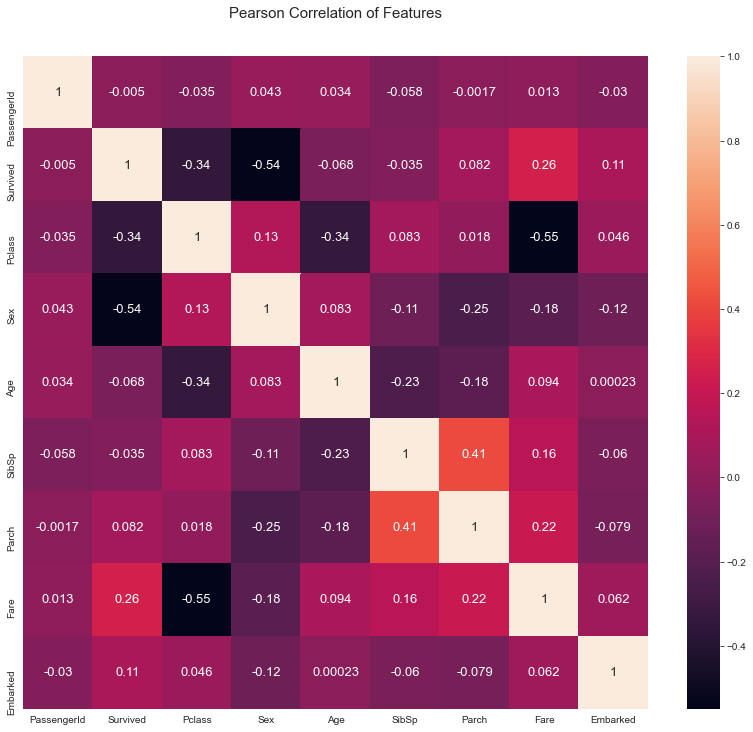

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), annot=True, annot_kws={"size": 13})

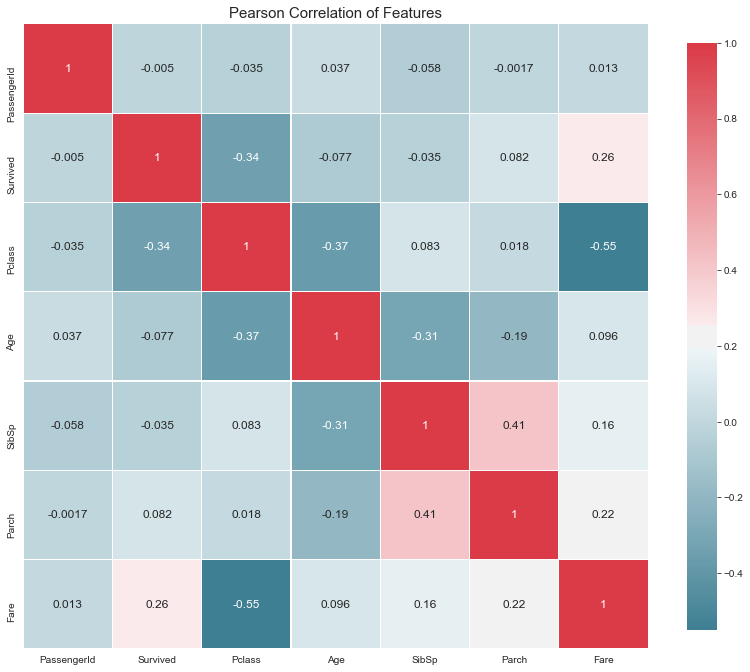

In [40]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

### 제출 파일 만들기

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# 예측
pred = dtree.predict(X_test)
pred[:15]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [30]:
test_passengerId = test['PassengerId']
pred = pred.astype(int)
df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
df_pred.to_csv("decision_first_model.csv", index=False)

### REF
seaborn heatmap cmap : https://pod.hatenablog.com/entry/2018/09/20/212527 <br>
seaborn set_style : https://www.codecademy.com/articles/seaborn-design-i